# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
print(combined_data.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [22]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()
print(f"Number of unique mice: {num_mice}")


Number of unique mice: 249


In [23]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
print("Duplicate mice:")
print(duplicates)


Duplicate mice:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           4

In [24]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = combined_data[combined_data["Mouse ID"].isin(duplicates["Mouse ID"])]
print("Data for duplicate mouse IDs:")
print(duplicate_mouse_data)


Data for duplicate mouse IDs:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female 

In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])


In [26]:
# Checking the number of mice in the clean DataFrame.
clean_num_mice = clean_data["Mouse ID"].nunique()
print(f"Number of unique mice in the clean DataFrame: {clean_num_mice}")


Number of unique mice in the clean DataFrame: 249


## Summary Statistics

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', st.sem])
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Std Dev', 'SEM']
print(summary_stats)



                   Mean     Median   Variance   Std Dev       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

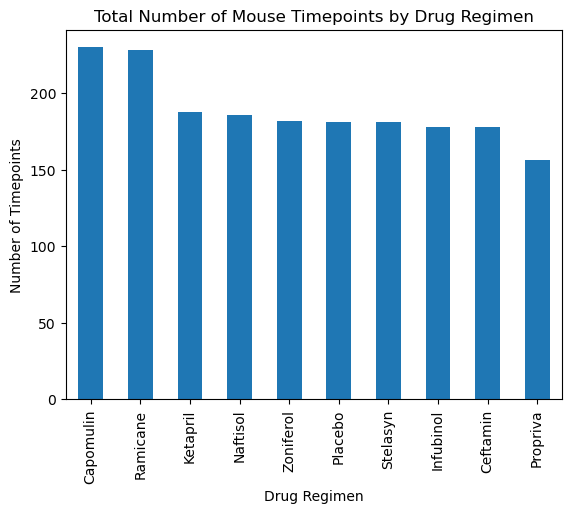

In [42]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
treatment_counts = clean_data['Drug Regimen'].value_counts()
treatment_counts.plot(kind='bar', title='Total Number of Mouse Timepoints by Drug Regimen', xlabel='Drug Regimen', ylabel='Number of Timepoints')
plt.show()


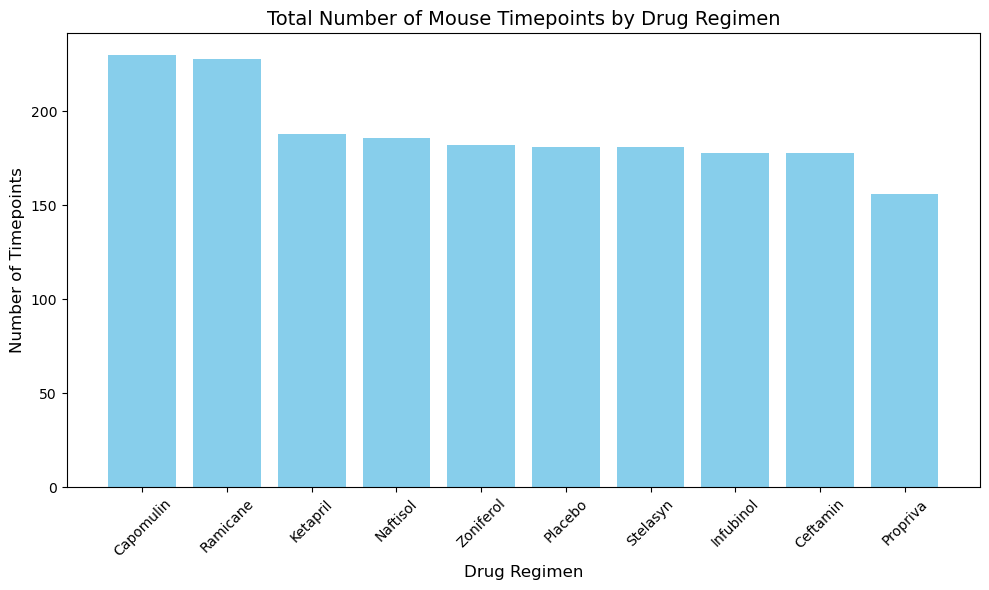

In [46]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(treatment_counts.index, treatment_counts.values, color='skyblue')

# Add title and labels
plt.title('Total Number of Mouse Timepoints by Drug Regimen', fontsize=14)
plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('Number of Timepoints', fontsize=12)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()

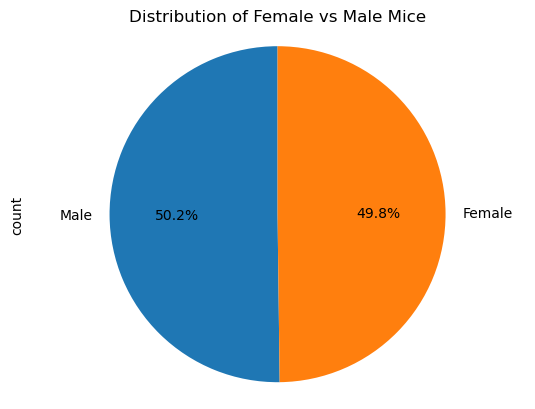

In [43]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
gender_counts = mouse_metadata['Sex'].value_counts()
gender_counts.plot.pie(autopct='%1.1f%%', title='Distribution of Female vs Male Mice', startangle=90)
plt.axis('equal')
plt.show()
# Get the unique mice with their gender


# Make the pie chart


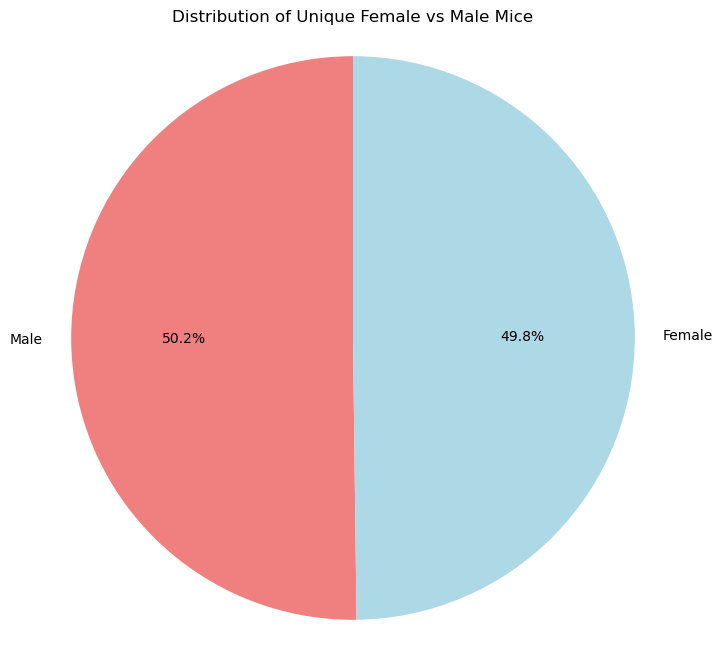

In [47]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_gender = mouse_metadata.drop_duplicates('Mouse ID')[['Mouse ID', 'Sex']]
gender_counts = unique_mice_gender['Sex'].value_counts()

# Make the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])

# Add a title
plt.title('Distribution of Unique Female vs Male Mice')

# Ensure the pie is a circle
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, clean_data, on=['Mouse ID', 'Timepoint'])


In [56]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Create a dictionary to hold outlier information for each treatment
outliers_dict = {}

# Loop through the treatments and calculate the IQR and identify outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Calculate the IQR
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    
    # Identify outliers
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    outliers_dict[treatment] = outliers
    
    # Add the tumor volumes to the list for plotting
    tumor_vol_data.append(tumor_volumes)

# Print out potential outliers for each treatment
for treatment, outlier_values in outliers_dict.items():
    print(f"{treatment}'s potential outliers: {outlier_values}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


/var/folders/w9/ltp1blq15w33_rwl0tpnnbm80000gn/T/ipykernel_53566/3387033739.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_vol_data, labels=treatments)


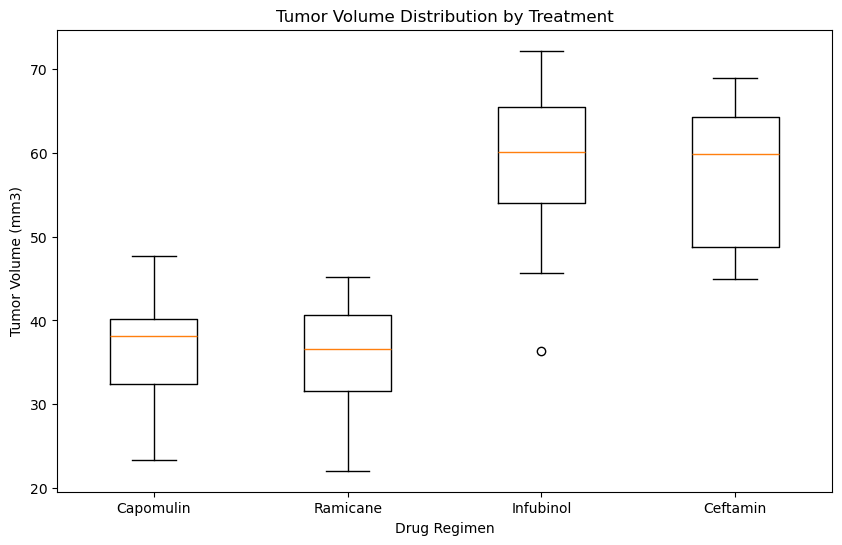

In [58]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments)

# Add title and labels
plt.title('Tumor Volume Distribution by Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()

## Line and Scatter Plots

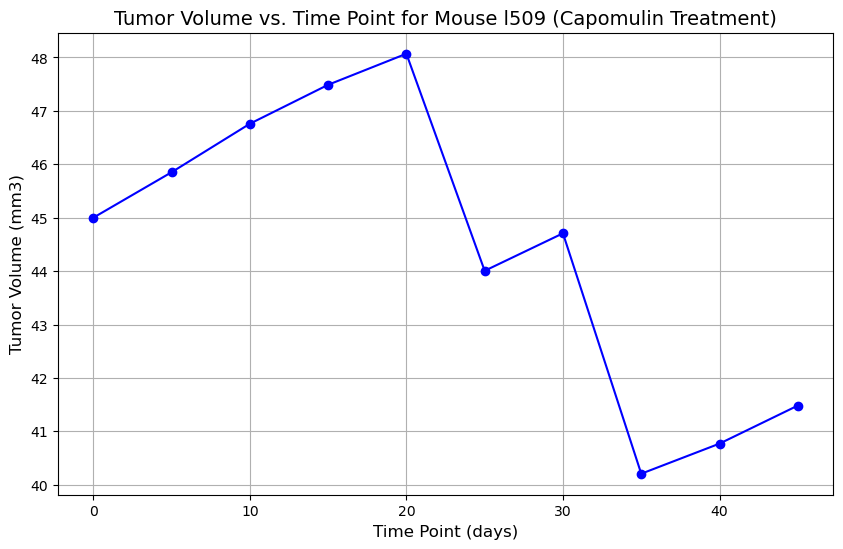

In [61]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'
mouse_data = clean_data[clean_data['Mouse ID'] == mouse_id]
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)', fontsize=14)
plt.xlabel('Time Point (days)', fontsize=12)
plt.ylabel('Tumor Volume (mm3)', fontsize=12)
plt.grid()
plt.show()

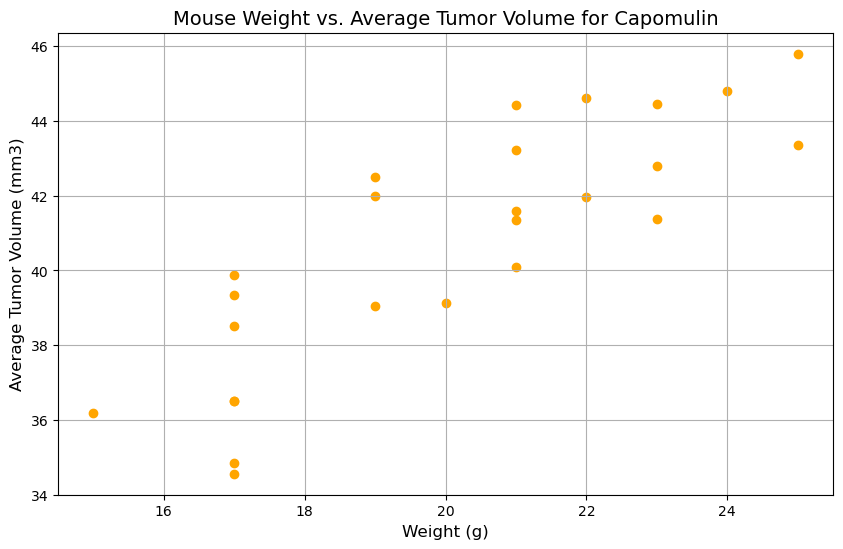

In [62]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
avg_tumor_vol = avg_tumor_vol.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'})

# Merge the average tumor volume data with the mouse metadata to get weights
capomulin_weight_data = pd.merge(avg_tumor_vol, mouse_metadata, on='Mouse ID')
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_weight_data['Weight (g)'], capomulin_weight_data['Average Tumor Volume (mm3)'], color='orange')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin', fontsize=14)
plt.xlabel('Weight (g)', fontsize=12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=12)
plt.grid()
plt.show()

## Correlation and Regression

Correlation coefficient between mouse weight and average tumor volume: 0.84


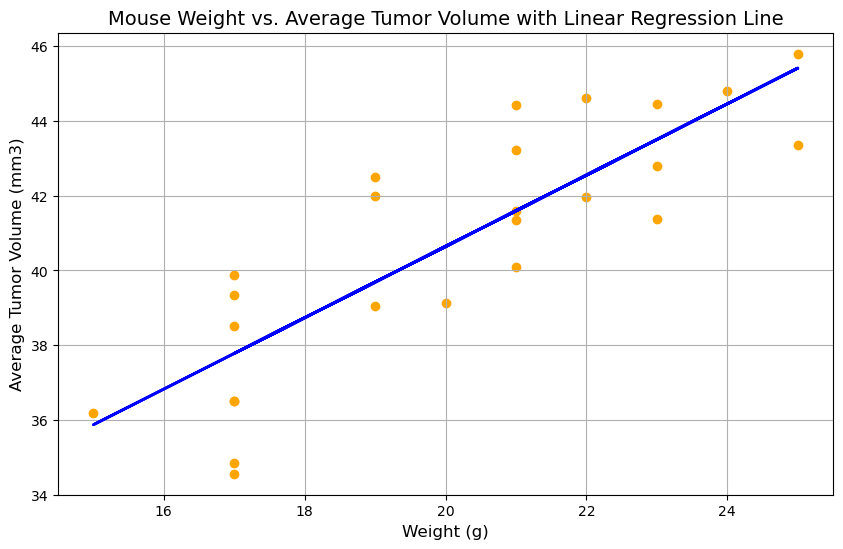

In [67]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

# Calculate correlation coefficient
correlation = capomulin_weight_data['Weight (g)'].corr(capomulin_weight_data['Average Tumor Volume (mm3)'])
print(f"Correlation coefficient between mouse weight and average tumor volume: {correlation:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(capomulin_weight_data['Weight (g)'], capomulin_weight_data['Average Tumor Volume (mm3)'])

# Create a linear regression line
regression_line = slope * capomulin_weight_data['Weight (g)'] + intercept

# Plot the scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_weight_data['Weight (g)'], capomulin_weight_data['Average Tumor Volume (mm3)'], color='orange')
plt.plot(capomulin_weight_data['Weight (g)'], regression_line, color='blue', linewidth=2)
plt.title('Mouse Weight vs. Average Tumor Volume with Linear Regression Line', fontsize=14)
plt.xlabel('Weight (g)', fontsize=12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=12)
plt.grid()
plt.show()